# Amino acid representation

The first layer of the **Seq2Sec** is a 1 to 1 convolution. This layer converts each residue from 20 channels used to represent amino acids in one-hot enconding format into C channels with real numbers. Therefore, this layer learns an effective representation of amino acids to be used along the network.

This notebook has some analysis of representations learned.

In [43]:
from seq2sec.model import load
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform

In [44]:
net = load('./models/resnet_cath95_ss3-ss4-buried.pth') 

/home/jgcarvalho/anaconda3/lib/python3.7/site-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'seq2sec.model.ResNet2' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [45]:
weights = net.state_dict()['feat.conv.weight'][:,1:-1,0]
aa = list('ACDEFGHIKLMNPQRSTVWY')

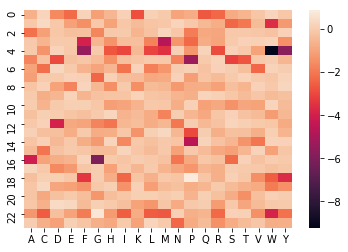

In [46]:
sns.heatmap(weights, xticklabels=aa);

### Distance between amino acids

Matrix of distances between amino acid representations calculated using euclidean distance. _Should I use standardized euclidean distance?_

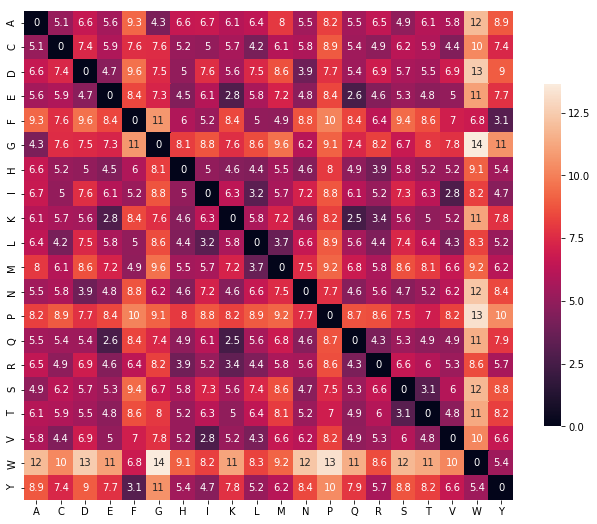

In [7]:
D = squareform(pdist(np.transpose(weights), 'euclidean', V=None))
plt.subplots(figsize=(11, 9))
sns.heatmap(D, square=True, annot=True, linewidths=.0, cbar_kws={"shrink": .7}, xticklabels=aa, yticklabels=aa);

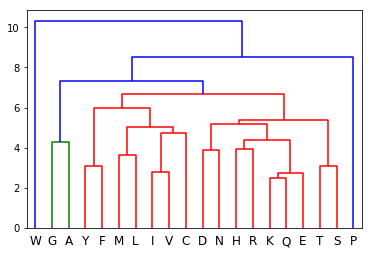

In [69]:
Z = linkage(np.transpose(weights), 'average', 'euclidean', optimal_ordering=True)
dendrogram(Z, labels=aa);

In [56]:
import pandas as pd
df = pd.DataFrame(np.array(weights), columns=aa)

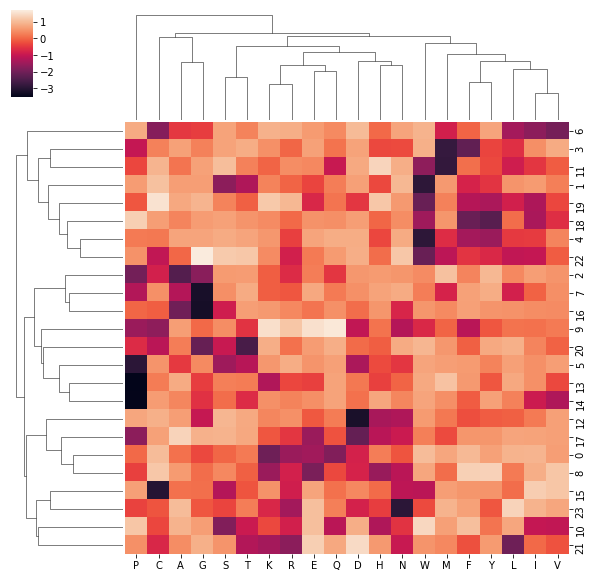

In [66]:
sns.clustermap(df, z_score=0, method='average')

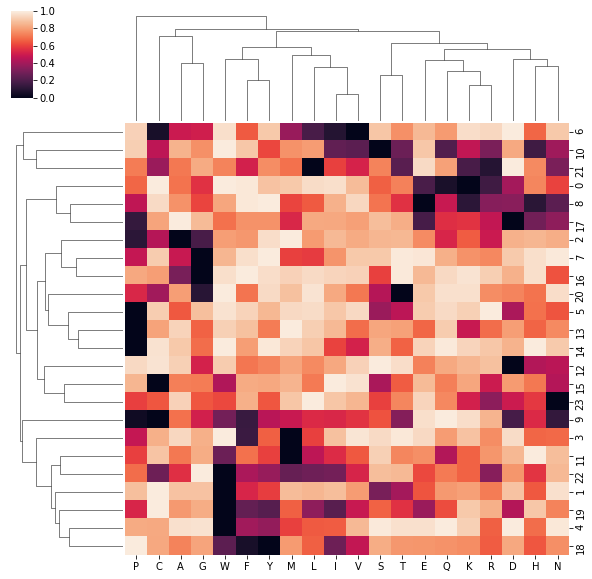

In [68]:
sns.clustermap(df, standard_scale=0, method="average")